In [3]:
pip install StatsModels

Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels as sm
from scipy import stats
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [88]:
data=pd.read_csv("Dano24/hackathon_data_actual.csv").drop(["Unnamed: 0.1", "Unnamed: 0"],axis=1)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   policy_rk                        25429 non-null  int64  
 1   total_premium_amt                25429 non-null  float64
 2   coverage                         25429 non-null  object 
 3   repair_option                    25429 non-null  object 
 4   paid_flg                         25429 non-null  int64  
 5   region                           25429 non-null  object 
 6   auto_make                        25429 non-null  object 
 7   auto_model                       25429 non-null  object 
 8   auto_cost                        25429 non-null  float64
 9   vehicle_mileage_km_amt           25429 non-null  float64
 10  vehicle_new_flg                  25429 non-null  float64
 11  audatex_claim_cnt                25429 non-null  float64
 12  audatex_total_cost

In [72]:
len(data["region"].unique())

75

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,min_driver_experience_years_cnt,insurant_gender_cd,age,issue_flg,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,uni
0,0,376775127,495900.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Москва,Toyota,Toyota Rav4,1600000.0,...,18,M,41.0,1,67325.31,0.0,0.0,0,0,37677512741.0M
1,1,284447889,418820.22,Полное КАСКО,Ремонт на СТОА официального дилера,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,13,M,34.0,1,0.00,0.0,0.0,0,0,28444788934.0M
2,2,384100566,209520.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,13,M,33.0,1,30978.18,1.0,539451.0,0,0,38410056633.0M
3,3,376032837,501300.00,Полное КАСКО,Ремонт на СТОА по направлению страховщика,0,Санкт-Петербург,Jaguar,Jaguar XE,1200000.0,...,22,F,56.0,1,366241.86,0.0,0.0,0,0,37603283756.0F
4,4,286011732,478800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Республика Карелия,Kia,Kia Sorento,2809000.0,...,24,M,53.0,1,394095.24,0.0,479898.0,0,0,28601173253.0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148470,148470,377770590,231300.00,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,0,Республика Карелия,Kia,Kia Seltos,2100000.0,...,5,M,28.0,1,65162.61,0.0,0.0,0,0,37777059028.0M
148471,148471,293965557,243603.18,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,1,Московская область,BMW,BMW 3er,1741500.0,...,5,M,25.0,1,0.00,0.0,0.0,0,0,29396555725.0M
148472,148472,388760604,457200.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Пензенская область,Hyundai,Hyundai Sonata,2185000.0,...,24,M,44.0,1,347329.62,0.0,0.0,0,0,38876060444.0M
148473,148473,383402733,982800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Краснодарский край,Cadillac,Cadillac Escalade,3200000.0,...,20,M,53.0,1,0.00,0.0,0.0,0,0,38340273353.0M


In [63]:
len(data.dropna())/len(data)

0.9390133019026772

In [36]:
sns.histplot(data["auto_model"])

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,issue_flg,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg
0,0,376775127,495900.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Москва,Toyota,Toyota Rav4,1600000.0,...,1,18,M,41.0,1,67325.31,0.0,0.0,0,0
1,1,284447889,418820.22,Полное КАСКО,Ремонт на СТОА официального дилера,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,0,13,M,34.0,1,0.00,0.0,0.0,0,0
2,2,384100566,209520.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,1,13,M,33.0,1,30978.18,1.0,539451.0,0,0
3,3,376032837,501300.00,Полное КАСКО,Ремонт на СТОА по направлению страховщика,0,Санкт-Петербург,Jaguar,Jaguar XE,1200000.0,...,0,22,F,56.0,1,366241.86,0.0,0.0,0,0
4,4,286011732,478800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Республика Карелия,Kia,Kia Sorento,2809000.0,...,0,24,M,53.0,1,394095.24,0.0,479898.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148470,148470,377770590,231300.00,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,0,Республика Карелия,Kia,Kia Seltos,2100000.0,...,1,5,M,28.0,1,65162.61,0.0,0.0,0,0
148471,148471,293965557,243603.18,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,1,Московская область,BMW,BMW 3er,1741500.0,...,0,5,M,25.0,1,0.00,0.0,0.0,0,0
148472,148472,388760604,457200.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Пензенская область,Hyundai,Hyundai Sonata,2185000.0,...,0,24,M,44.0,1,347329.62,0.0,0.0,0,0
148473,148473,383402733,982800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Краснодарский край,Cadillac,Cadillac Escalade,3200000.0,...,0,20,M,53.0,1,0.00,0.0,0.0,0,0


In [10]:
data["repair_option"].unique()

array(['Ремонт на СТОА официального дилера',
       'Ремонт на СТОА по направлению страховщика',
       'Отсутствует/неизвестно',
       'Эконом ремонт на СТОА по направлению Страховщика'], dtype=object)

In [11]:
data["coverage"].unique()

array(['Тоталь + Угон', 'Полное КАСКО', 'Только ущерб', 'Только Угон'],
      dtype=object)

In [ ]:
data["

<Axes: xlabel='total_premium_amt', ylabel='Count'>

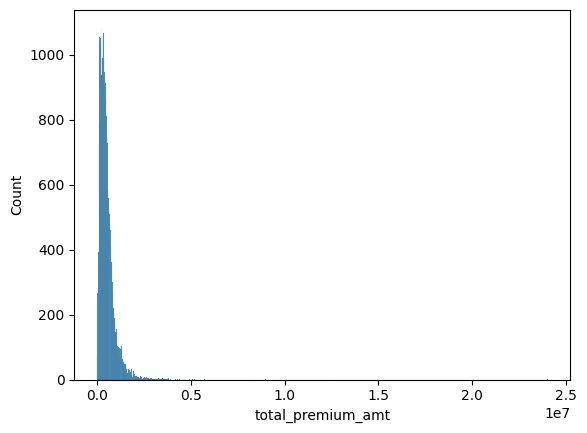

In [69]:
sns.histplot(data["total_premium_amt"])

<Axes: xlabel='region', ylabel='Count'>

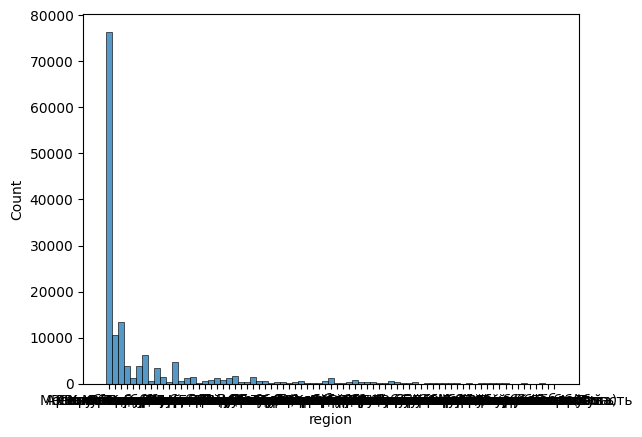

In [14]:
sns.histplot(data["region"])

<Axes: ylabel='auto_cost'>

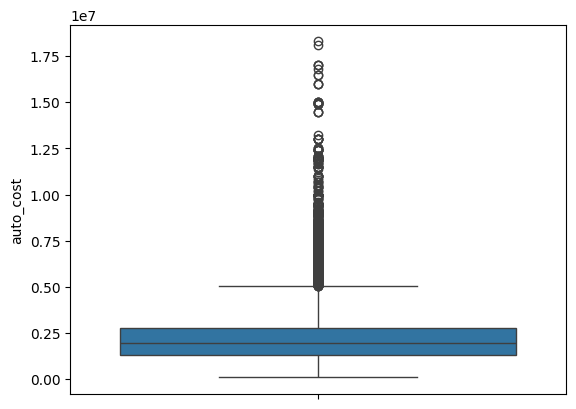

In [75]:
sns.boxplot(data["auto_cost"])

<Axes: xlabel='vehicle_issue_year', ylabel='total_premium_amt'>

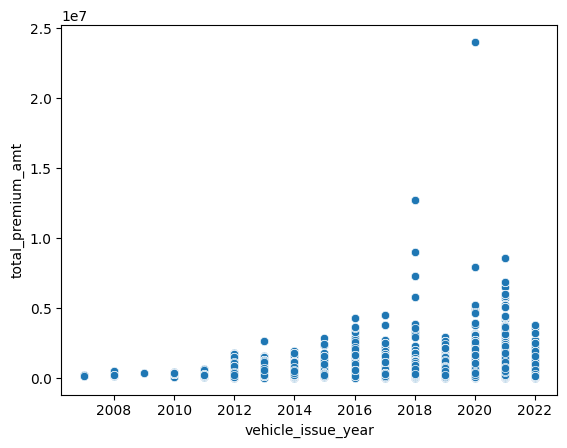

In [16]:
sns.scatterplot(x=data["vehicle_issue_year"],y=data["total_premium_amt"])

<Axes: xlabel='vehicle_issue_year', ylabel='auto_cost'>

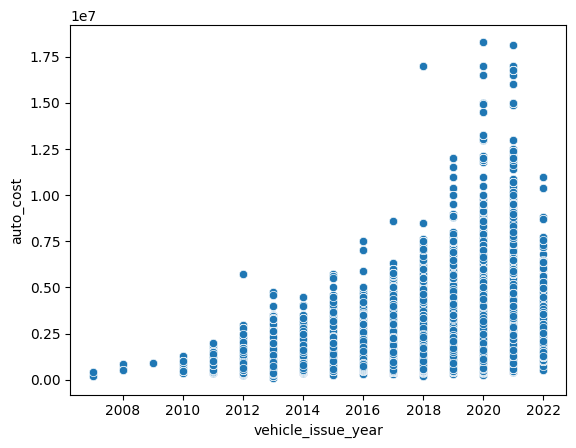

In [18]:
sns.scatterplot(x=data["vehicle_issue_year"],y=data["auto_cost"])

<Axes: xlabel='age', ylabel='vehicle_issue_year'>

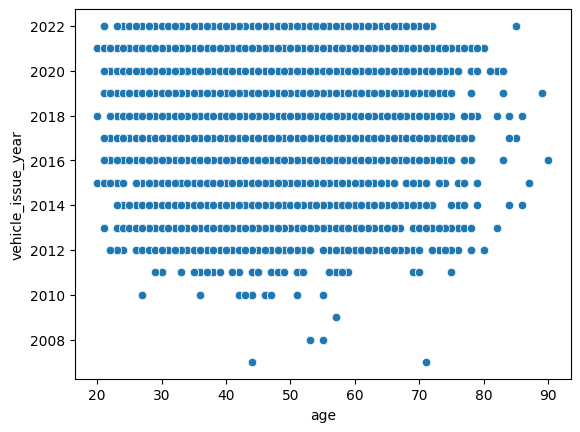

In [21]:
sns.scatterplot(x=data["age"],y=data["vehicle_issue_year"])

<Axes: xlabel='expected_loss_amt', ylabel='total_premium_amt'>

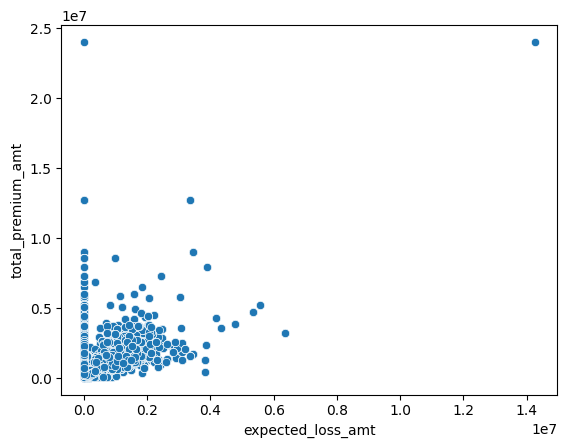

In [22]:
sns.scatterplot(x=data["expected_loss_amt"],y=data["total_premium_amt"])

<Axes: xlabel='audatex_total_cost_amt', ylabel='Count'>

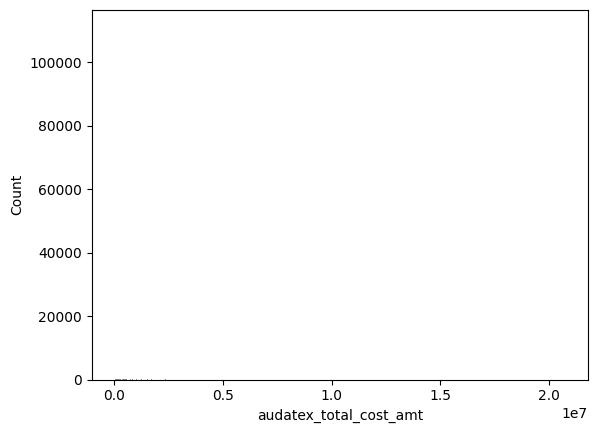

In [26]:
sns.histplot(data["audatex_total_cost_amt"])

<Axes: xlabel='expected_loss_amt', ylabel='Count'>

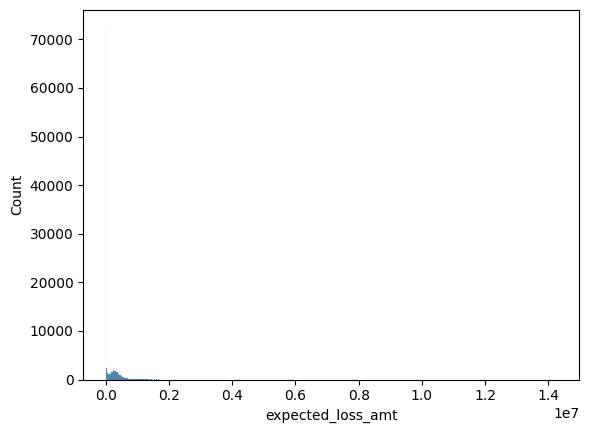

In [27]:
sns.histplot(data["expected_loss_amt"])

<Axes: xlabel='premium_transition_amt', ylabel='total_premium_amt'>

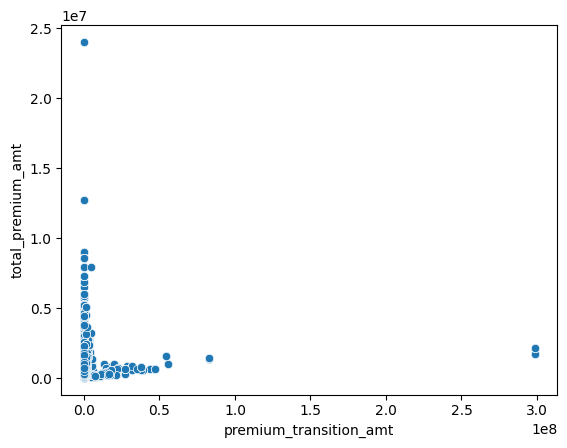

In [29]:
sns.scatterplot(x=data["premium_transition_amt"],y=data["total_premium_amt"])

<Axes: xlabel='paid_flg', ylabel='Count'>

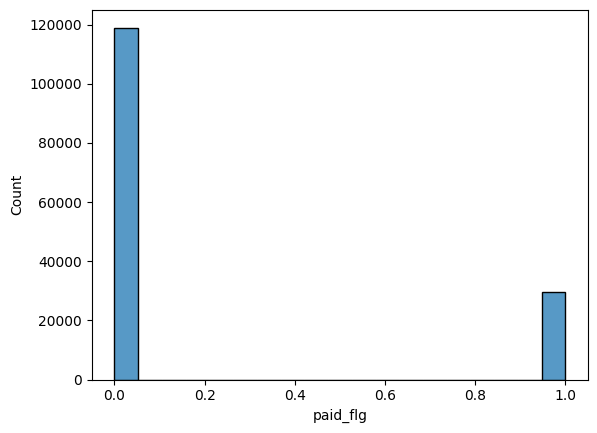

In [33]:
sns.histplot(data["paid_flg"])

## Удаление выбросов

In [76]:
def granysow(data,k=1.5):
    r=data.quantile(0.75)
    m=data.median()
    l=data.quantile(0.25)
    return (m-((r-l)*k),m+((r-l)*k))

In [158]:
def del_vibros(data,n):
    for c in data.columns:
        l,r=granysow(data[c],k=n)
        if(l==0 and r==0):
            continue
        data=data.drop(data[(data[c]>r) | (data[c]<l)].index,axis=0)
    return data

In [174]:
number_data=[]
for i in data.columns[1:]:
    if is_numeric_dtype(data[i]) and len(data[i].unique())>2:
        number_data.append(i)
data[number_data]

,total_premium_amt,auto_cost,vehicle_mileage_km_amt,audatex_claim_cnt,audatex_total_cost_amt,vehicle_issue_year,min_driver_experience_years_cnt,age,expected_loss_amt,premium_transition_amt
0,787323.60,2340000.0,15500.0,0.0,0.0,2018,15,45.0,0.00,0.0
1,33526.08,1765800.0,10000.0,0.0,0.0,2019,16,52.0,0.00,0.0
2,540900.00,2200000.0,100.0,0.0,0.0,2021,15,36.0,351270.00,0.0
3,374400.00,2325000.0,5000.0,0.0,0.0,2020,18,42.0,248590.53,626679.0
4,231300.00,1390000.0,17000.0,0.0,0.0,2018,19,50.0,124247.16,0.0
...,...,...,...,...,...,...,...,...,...,...
25424,545949.90,3600000.0,15900.0,0.0,0.0,2020,10,42.0,0.00,0.0
25425,98100.00,520000.0,50000.0,0.0,0.0,2018,34,52.0,35320.05,0.0
25426,127800.00,1737547.0,41000.0,0.0,0.0,2019,18,36.0,31221.90,214731.0
25427,99000.00,1698387.0,6000.0,0.0,0.0,2020,18,50.0,21796.92,129114.0


In [175]:
new_data=del_vibros(data[number_data],n=1.5)

In [171]:
new_data[number_data]

,policy_rk,total_premium_amt,auto_cost,vehicle_mileage_km_amt,audatex_claim_cnt,audatex_total_cost_amt,vehicle_issue_year,min_driver_experience_years_cnt,age,expected_loss_amt,premium_transition_amt
0,283363056,787323.60,2340000.0,15500.0,0.0,0.0,2018,15,45.0,0.00,0.0
1,283392099,33526.08,1765800.0,10000.0,0.0,0.0,2019,16,52.0,0.00,0.0
2,283592373,540900.00,2200000.0,100.0,0.0,0.0,2021,15,36.0,351270.00,0.0
3,283594449,374400.00,2325000.0,5000.0,0.0,0.0,2020,18,42.0,248590.53,626679.0
4,283594911,231300.00,1390000.0,17000.0,0.0,0.0,2018,19,50.0,124247.16,0.0
...,...,...,...,...,...,...,...,...,...,...,...
25414,391639794,290700.00,809030.0,19360.0,0.0,0.0,2019,12,39.0,160703.55,0.0
25424,392100519,545949.90,3600000.0,15900.0,0.0,0.0,2020,10,42.0,0.00,0.0
25426,393376635,127800.00,1737547.0,41000.0,0.0,0.0,2019,18,36.0,31221.90,214731.0
25427,394837443,99000.00,1698387.0,6000.0,0.0,0.0,2020,18,50.0,21796.92,129114.0


-193590.0 1034910.0


<Axes: ylabel='total_premium_amt'>

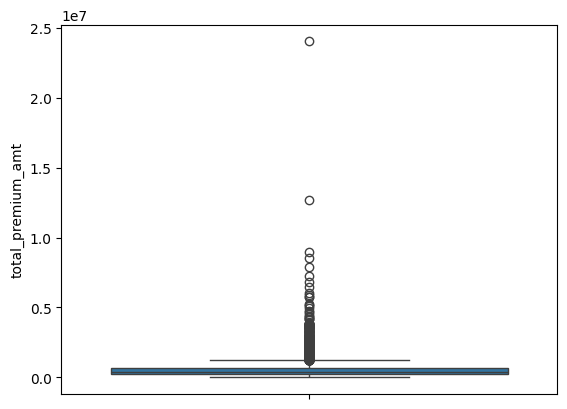

In [183]:
l,r=granysow(data["total_premium_amt"],k=1.5)
print(l,r)
sns.boxplot(data["total_premium_amt"])

-299329.0 4200671.0


<Axes: ylabel='auto_cost'>

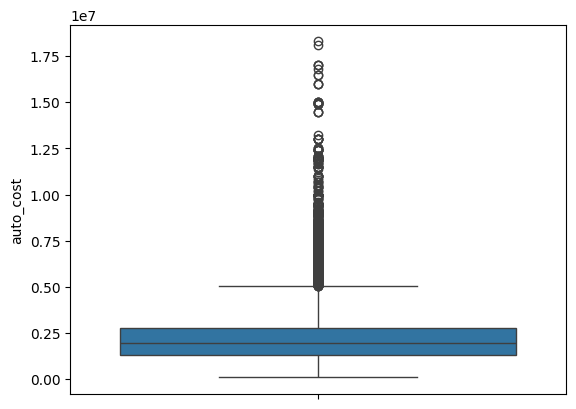

In [184]:
l,r=granysow(data["auto_cost"],k=1.5)
print(l,r)
sns.boxplot(data["auto_cost"])

-29150.0 55150.0


<Axes: ylabel='vehicle_mileage_km_amt'>

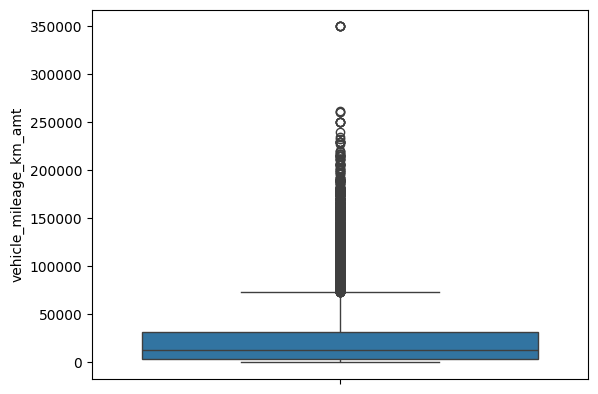

In [185]:
l,r=granysow(data["vehicle_mileage_km_amt"],k=1.5)
print(l,r)
sns.boxplot(data["vehicle_mileage_km_amt"])

-1.5 1.5


<Axes: ylabel='audatex_claim_cnt'>

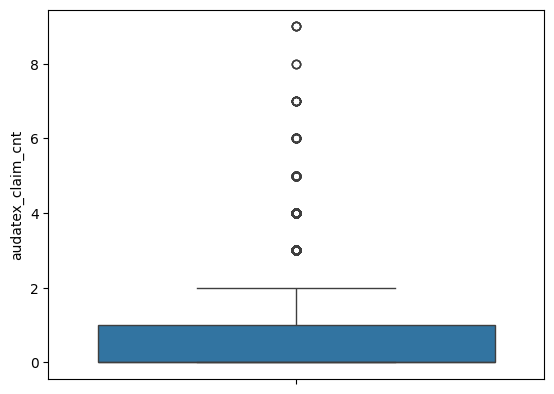

In [186]:
l,r=granysow(data["audatex_claim_cnt"],k=1.5)
print(l,r)
sns.boxplot(data["audatex_claim_cnt"])

-34020.0 34020.0


<Axes: ylabel='audatex_total_cost_amt'>

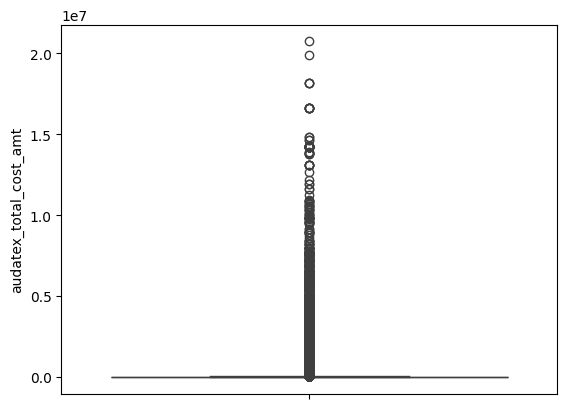

In [211]:
l,r=granysow(data["audatex_total_cost_amt"],k=1.5)
print(l,r)
sns.boxplot(data["audatex_total_cost_amt"])

-1458162.0 3139776.0


<Axes: ylabel='audatex_total_cost_amt'>

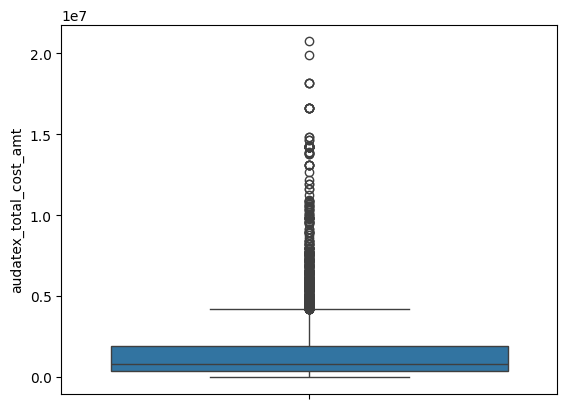

In [231]:
data2=pd.DataFrame([])
data2=data[data["audatex_total_cost_amt"]>0]
l,r=granysow(data2["audatex_total_cost_amt"],k=1.5)
print(l,r)
sns.boxplot(data2["audatex_total_cost_amt"])

-2.0 34.0


<Axes: ylabel='min_driver_experience_years_cnt'>

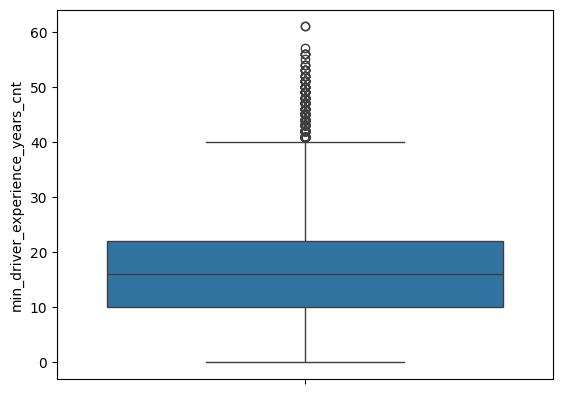

In [188]:
l,r=granysow(data["min_driver_experience_years_cnt"],k=1.5)
print(l,r)
sns.boxplot(data["min_driver_experience_years_cnt"])

19.5 64.5


<Axes: ylabel='age'>

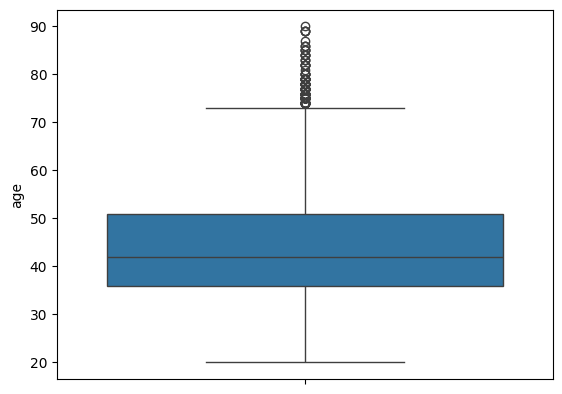

In [189]:
l,r=granysow(data["age"],k=1.5)
print(l,r)
sns.boxplot(data["age"])

-220201.42500000005 732396.645


<Axes: ylabel='expected_loss_amt'>

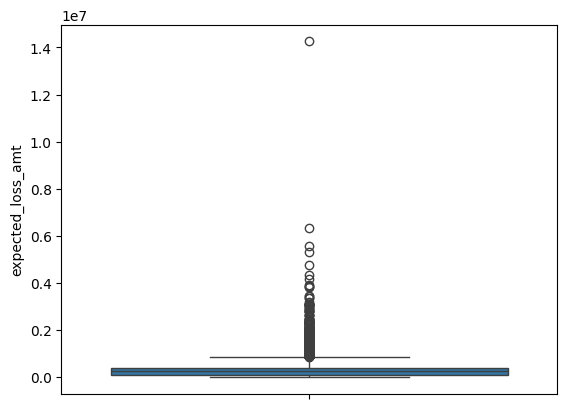

In [190]:
l,r=granysow(data["expected_loss_amt"],k=1.5)
print(l,r)
sns.boxplot(data["expected_loss_amt"])

-107545.5 1161751.5


<Axes: ylabel='premium_transition_amt'>

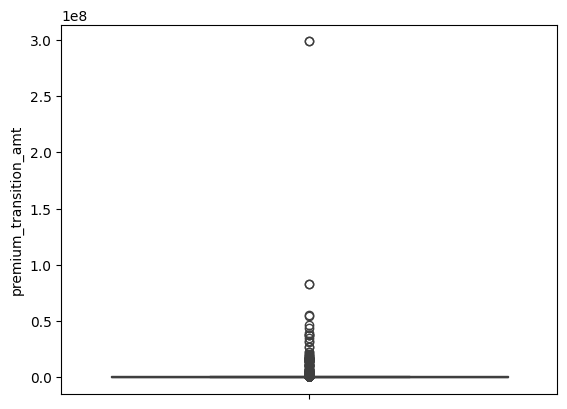

In [232]:
data3=pd.DataFrame([])
data3=data[data["premium_transition_amt"]>1.0]
l,r=granysow(data3["premium_transition_amt"],k=1.5)
print(l,r)
sns.boxplot(data3["premium_transition_amt"])

In [294]:
new_data=data[(data["total_premium_amt"]<=2.5*1e6)&(data["vehicle_mileage_km_amt"]<=100000)&(data["audatex_total_cost_amt"]<=1.5*1e7)&(data["min_driver_experience_years_cnt"]<=60)&(data["age"]<=64.5)&(data["expected_loss_amt"]<=1.5*1e6)&(data["premium_transition_amt"]<3*1e6)&(data["auto_cost"]<=1*1e7)&(data["audatex_claim_cnt"]<=4)]

In [295]:
new_data

,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,vehicle_mileage_km_amt,...,min_driver_experience_years_cnt,insurant_gender_cd,age,issue_flg,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,unique
0,283363056,787323.60,Полное КАСКО,Ремонт на СТОА официального дилера,1,Иркутская область,Mazda,Mazda CX-9,2340000.0,15500.0,...,15,M,45.0,1,0.00,0.0,0.0,0,0,283363056M45.0
1,283392099,33526.08,Полное КАСКО,Ремонт на СТОА официального дилера,1,Москва,Subaru,Subaru Legacy,1765800.0,10000.0,...,16,M,52.0,1,0.00,0.0,0.0,1,1,283392099M52.0
2,283592373,540900.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Москва,Nissan,Nissan X-Trail,2200000.0,100.0,...,15,M,36.0,1,351270.00,0.0,0.0,0,0,283592373M36.0
3,283594449,374400.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Москва,Mini (BMW),Mini (BMW) Countryman,2325000.0,5000.0,...,18,F,42.0,1,248590.53,1.0,626679.0,0,0,283594449F42.0
4,283594911,231300.00,Полное КАСКО,Ремонт на СТОА по направлению страховщика,1,Санкт-Петербург,Renault,Renault Kaptur,1390000.0,17000.0,...,19,F,50.0,1,124247.16,0.0,0.0,0,0,283594911F50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25424,392100519,545949.90,Полное КАСКО,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Grand Starex,3600000.0,15900.0,...,10,M,42.0,1,0.00,0.0,0.0,1,0,392100519M42.0
25425,392728452,98100.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Чувашская республика,Lada,Lada Largus,520000.0,50000.0,...,34,M,52.0,1,35320.05,0.0,0.0,1,1,392728452M52.0
25426,393376635,127800.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Нижегородская область,Kia,Kia Sportage,1737547.0,41000.0,...,18,M,36.0,1,31221.90,1.0,214731.0,0,0,393376635M36.0
25427,394837443,99000.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Нижегородская область,Kia,Kia Seltos,1698387.0,6000.0,...,18,M,50.0,1,21796.92,1.0,129114.0,0,0,394837443M50.0


<Axes: xlabel='total_premium_amt', ylabel='Count'>

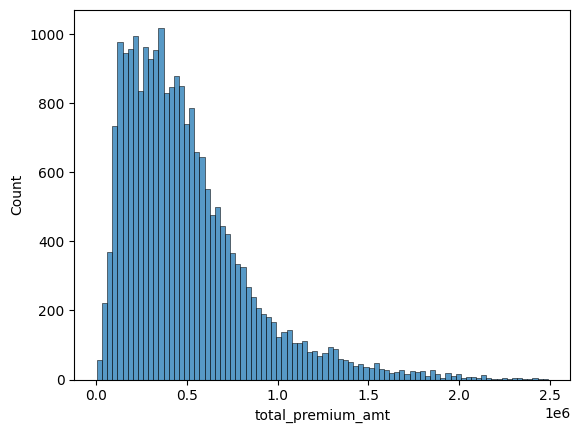

In [277]:
sns.histplot(new_data["total_premium_amt"])

<Axes: xlabel='auto_cost', ylabel='Count'>

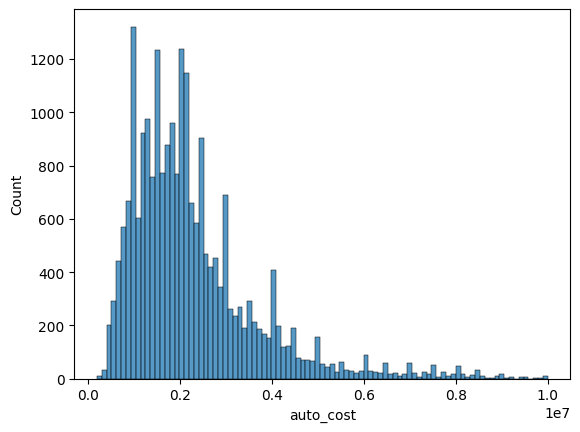

In [278]:
sns.histplot(new_data["auto_cost"])

<Axes: xlabel='vehicle_mileage_km_amt', ylabel='Count'>

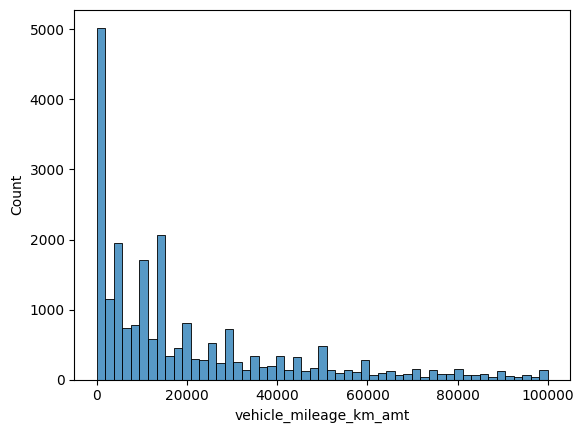

In [279]:
sns.histplot(new_data["vehicle_mileage_km_amt"])

<Axes: xlabel='audatex_claim_cnt', ylabel='Count'>

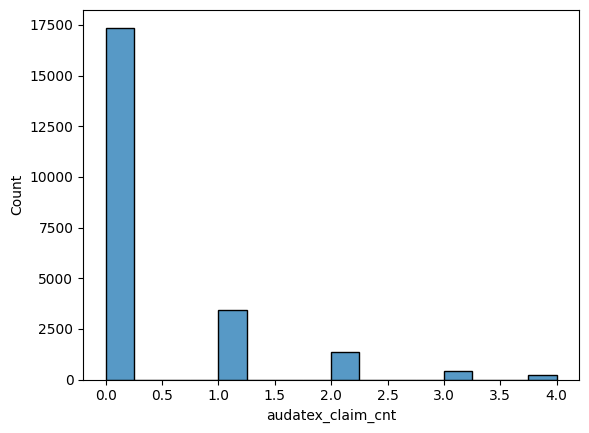

In [280]:
sns.histplot(new_data["audatex_claim_cnt"])

<Axes: xlabel='audatex_total_cost_amt', ylabel='Count'>

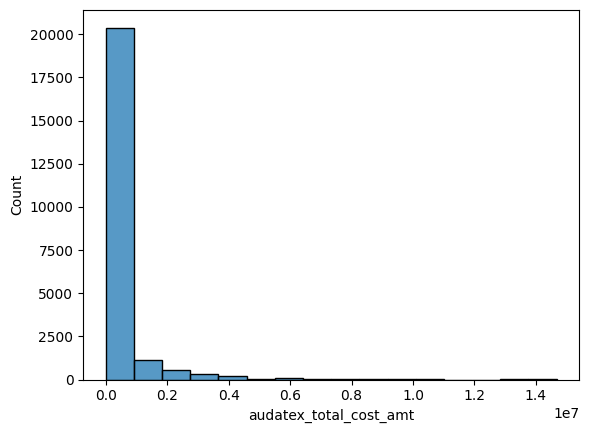

In [281]:
sns.histplot(new_data["audatex_total_cost_amt"])

<Axes: xlabel='vehicle_issue_year', ylabel='Count'>

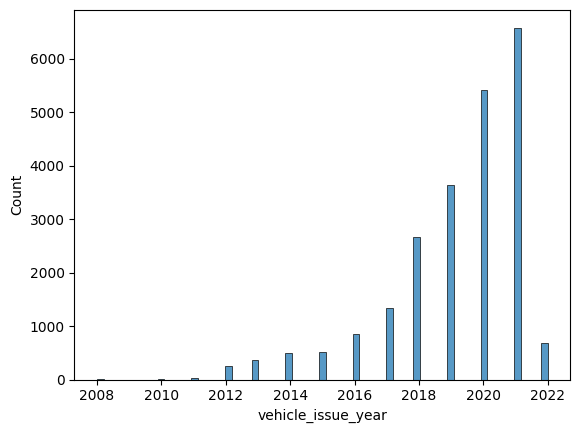

In [282]:
sns.histplot(new_data["vehicle_issue_year"])

<Axes: xlabel='min_driver_experience_years_cnt', ylabel='Count'>

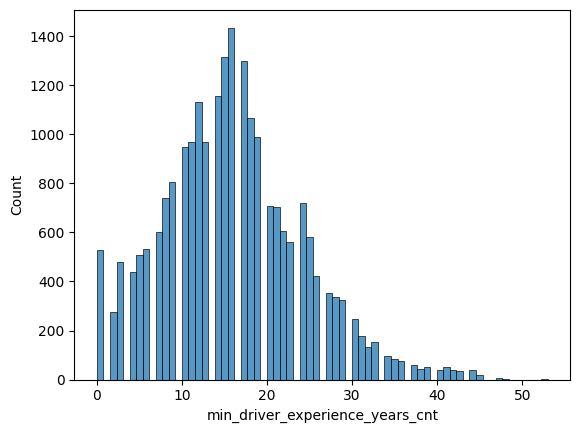

In [283]:
sns.histplot(new_data["min_driver_experience_years_cnt"])

<Axes: xlabel='age', ylabel='Count'>

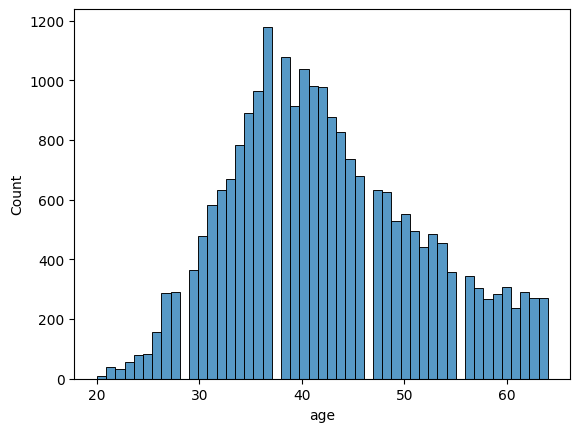

In [284]:
sns.histplot(new_data["age"])

<Axes: xlabel='expected_loss_amt', ylabel='Count'>

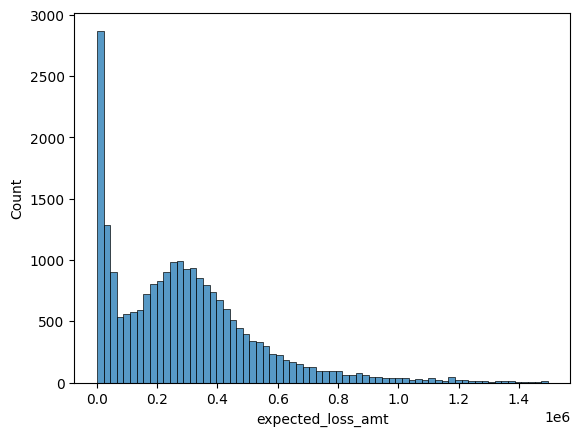

In [285]:
sns.histplot(new_data["expected_loss_amt"])

<Axes: xlabel='premium_transition_amt', ylabel='Count'>

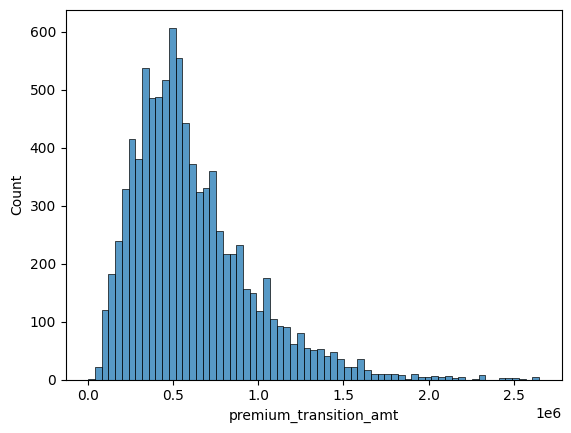

In [296]:
data2=new_data[new_data["premium_transition_amt"]>0]
sns.histplot(data2["premium_transition_amt"])

In [298]:
new_data.to_csv("hackathon_data_actual.csv")